<a href="https://colab.research.google.com/github/MaxWilhames/Treinamento-Reflexo-Alterado/blob/main/DetectorRedEyes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#YOLOv8 Detection on a Custom Dataset

## Hardware accelerator

In [ ]:
!nvidia-smi

Fri Sep 12 14:52:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO

In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.0/112.6 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Dataset Roboflow

In [ ]:
!pip install roboflow

from IPython import display
display.clear_output()

In [ ]:
#INSERIR O DATASET AQUI

!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="uXpfiCE0Bqi9o7UncROw")
project = rf.workspace("anemia-max").project("reflexo-vermelho")
version = project.version(3)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Reflexo-vermelho-3 in yolov11:: 100%|██████████| 1028/1028 [00:00<00:00, 9460.29it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11n.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 batch=32

/content
Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/Reflexo-vermelho-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspec

## Results

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml			 labels.jpg	      train_batch1.jpg
BoxF1_curve.png			 results.csv	      train_batch2.jpg
BoxP_curve.png			 results.png	      val_batch0_labels.jpg
BoxPR_curve.png			 train_batch0.jpg     val_batch0_pred.jpg
BoxR_curve.png			 train_batch1080.jpg  val_batch1_labels.jpg
confusion_matrix_normalized.png  train_batch1081.jpg  val_batch1_pred.jpg
confusion_matrix.png		 train_batch1082.jpg  weights


/content


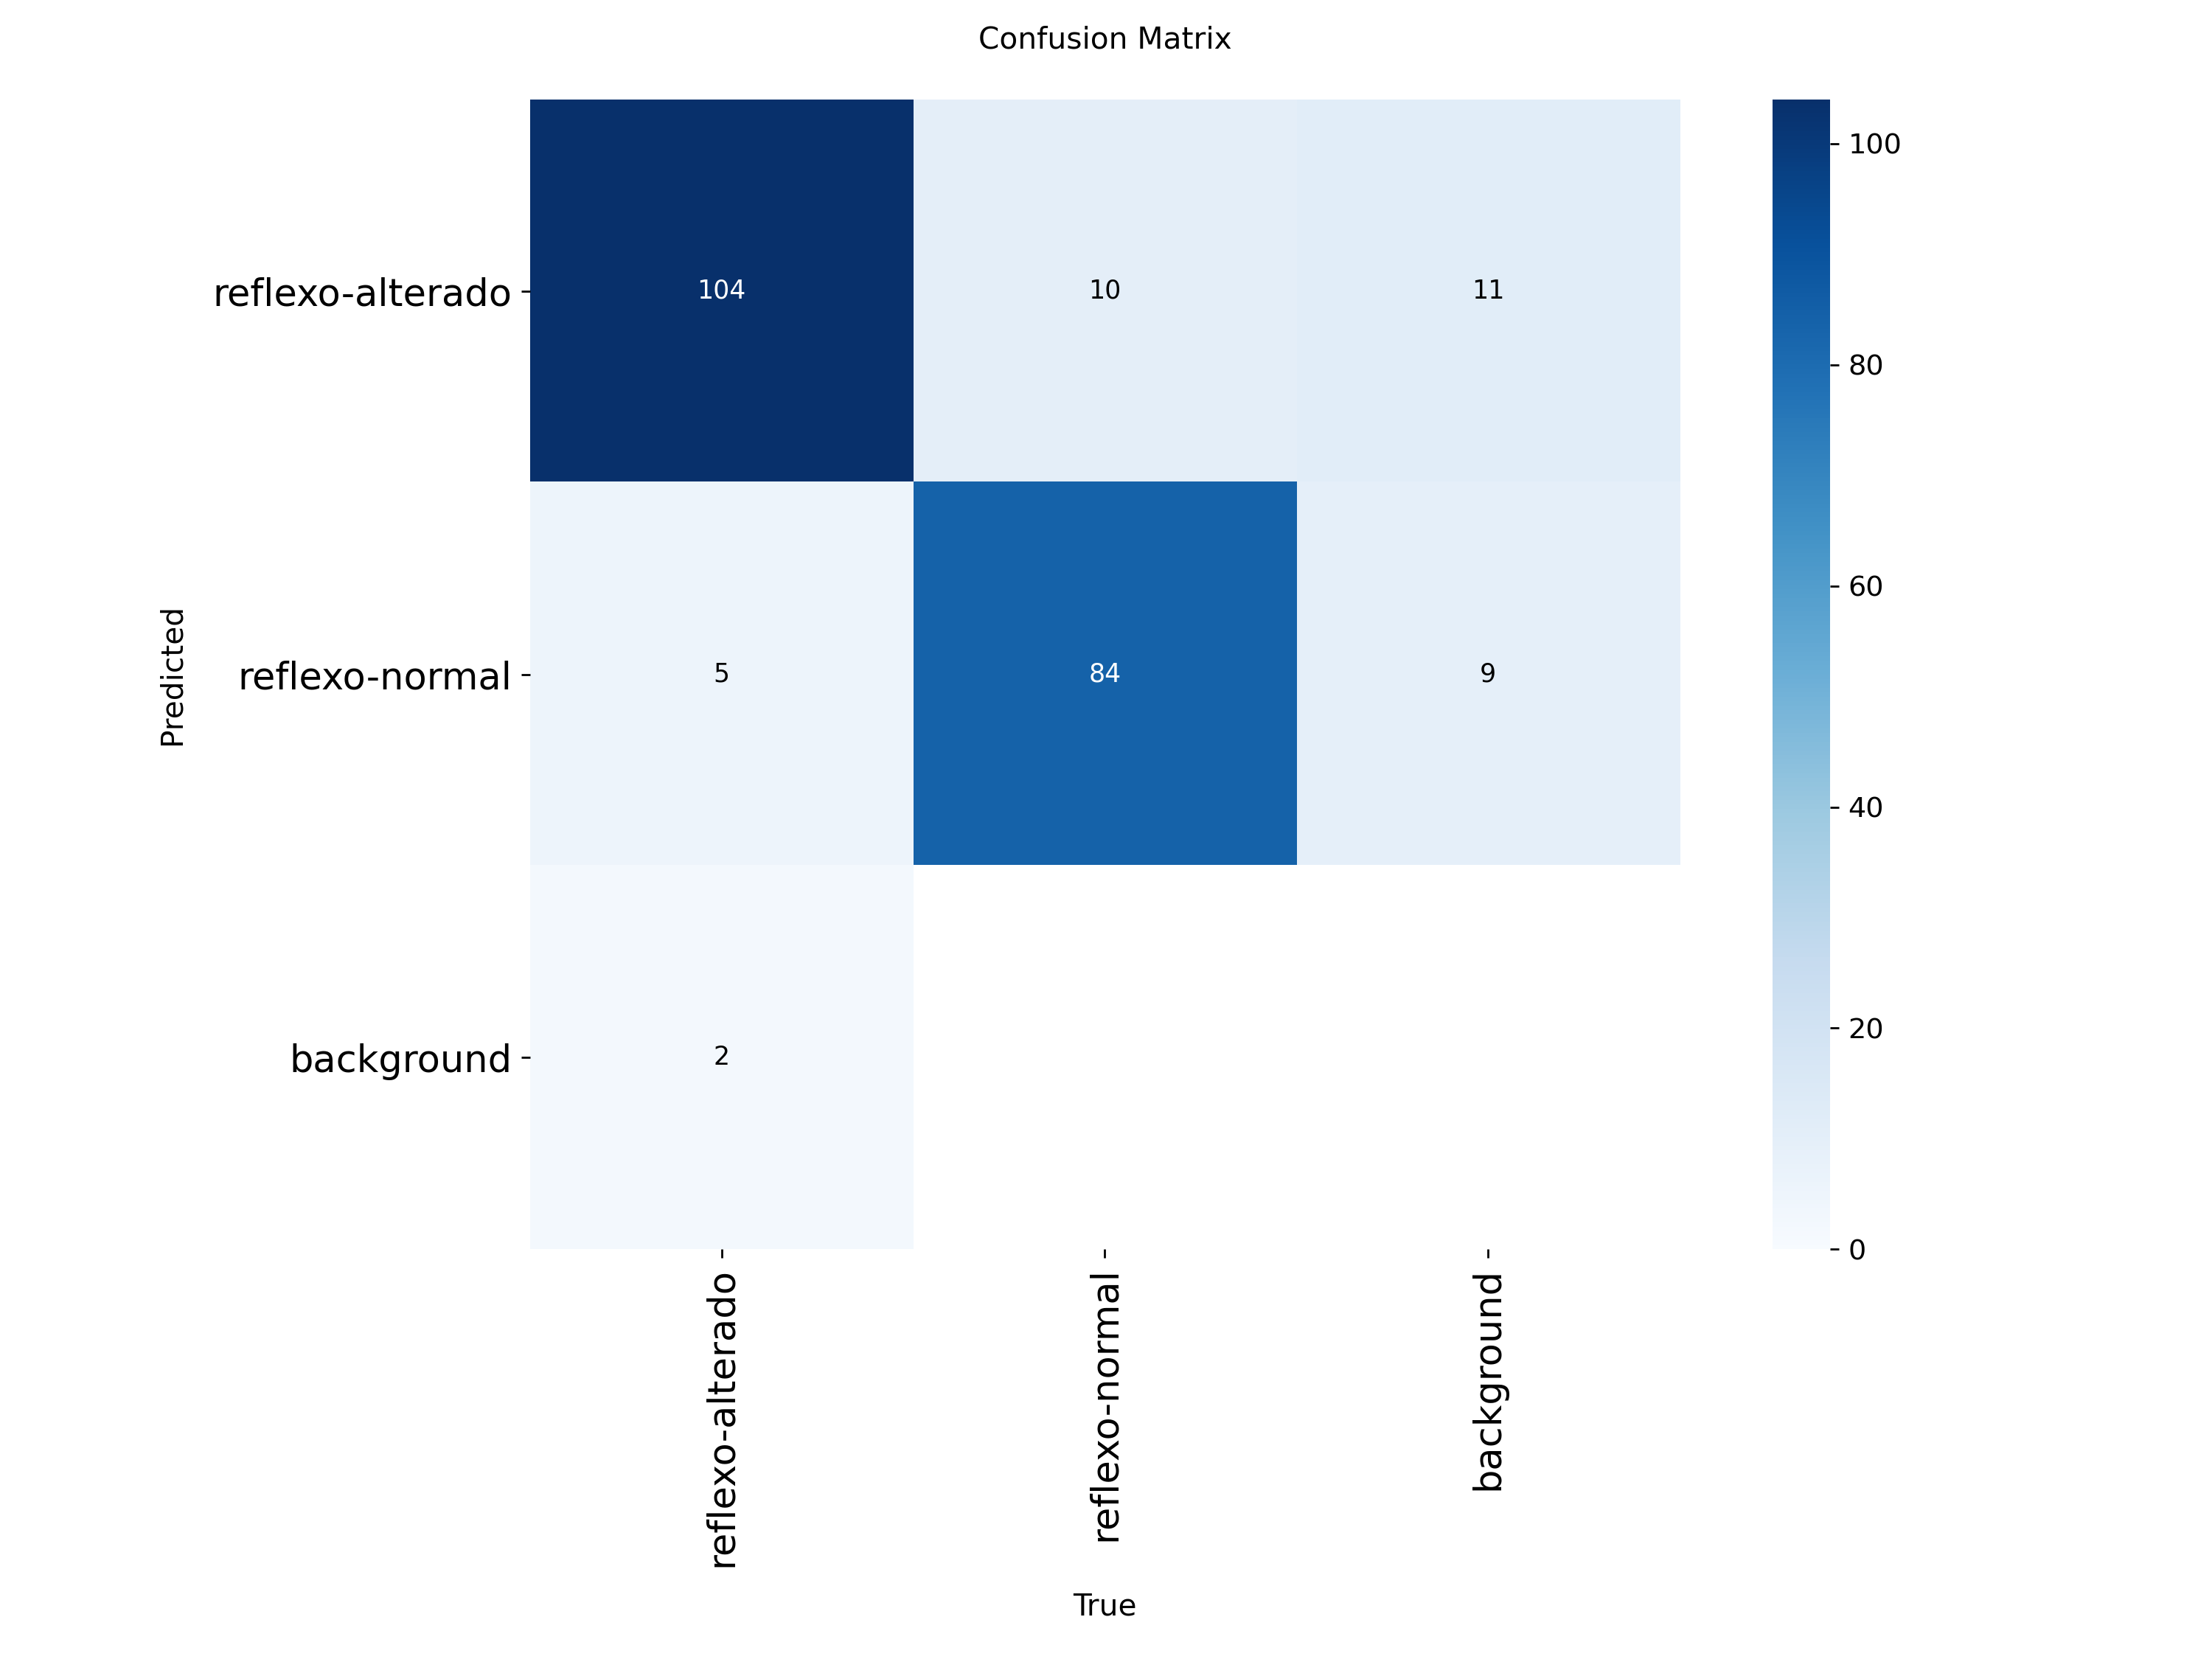

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


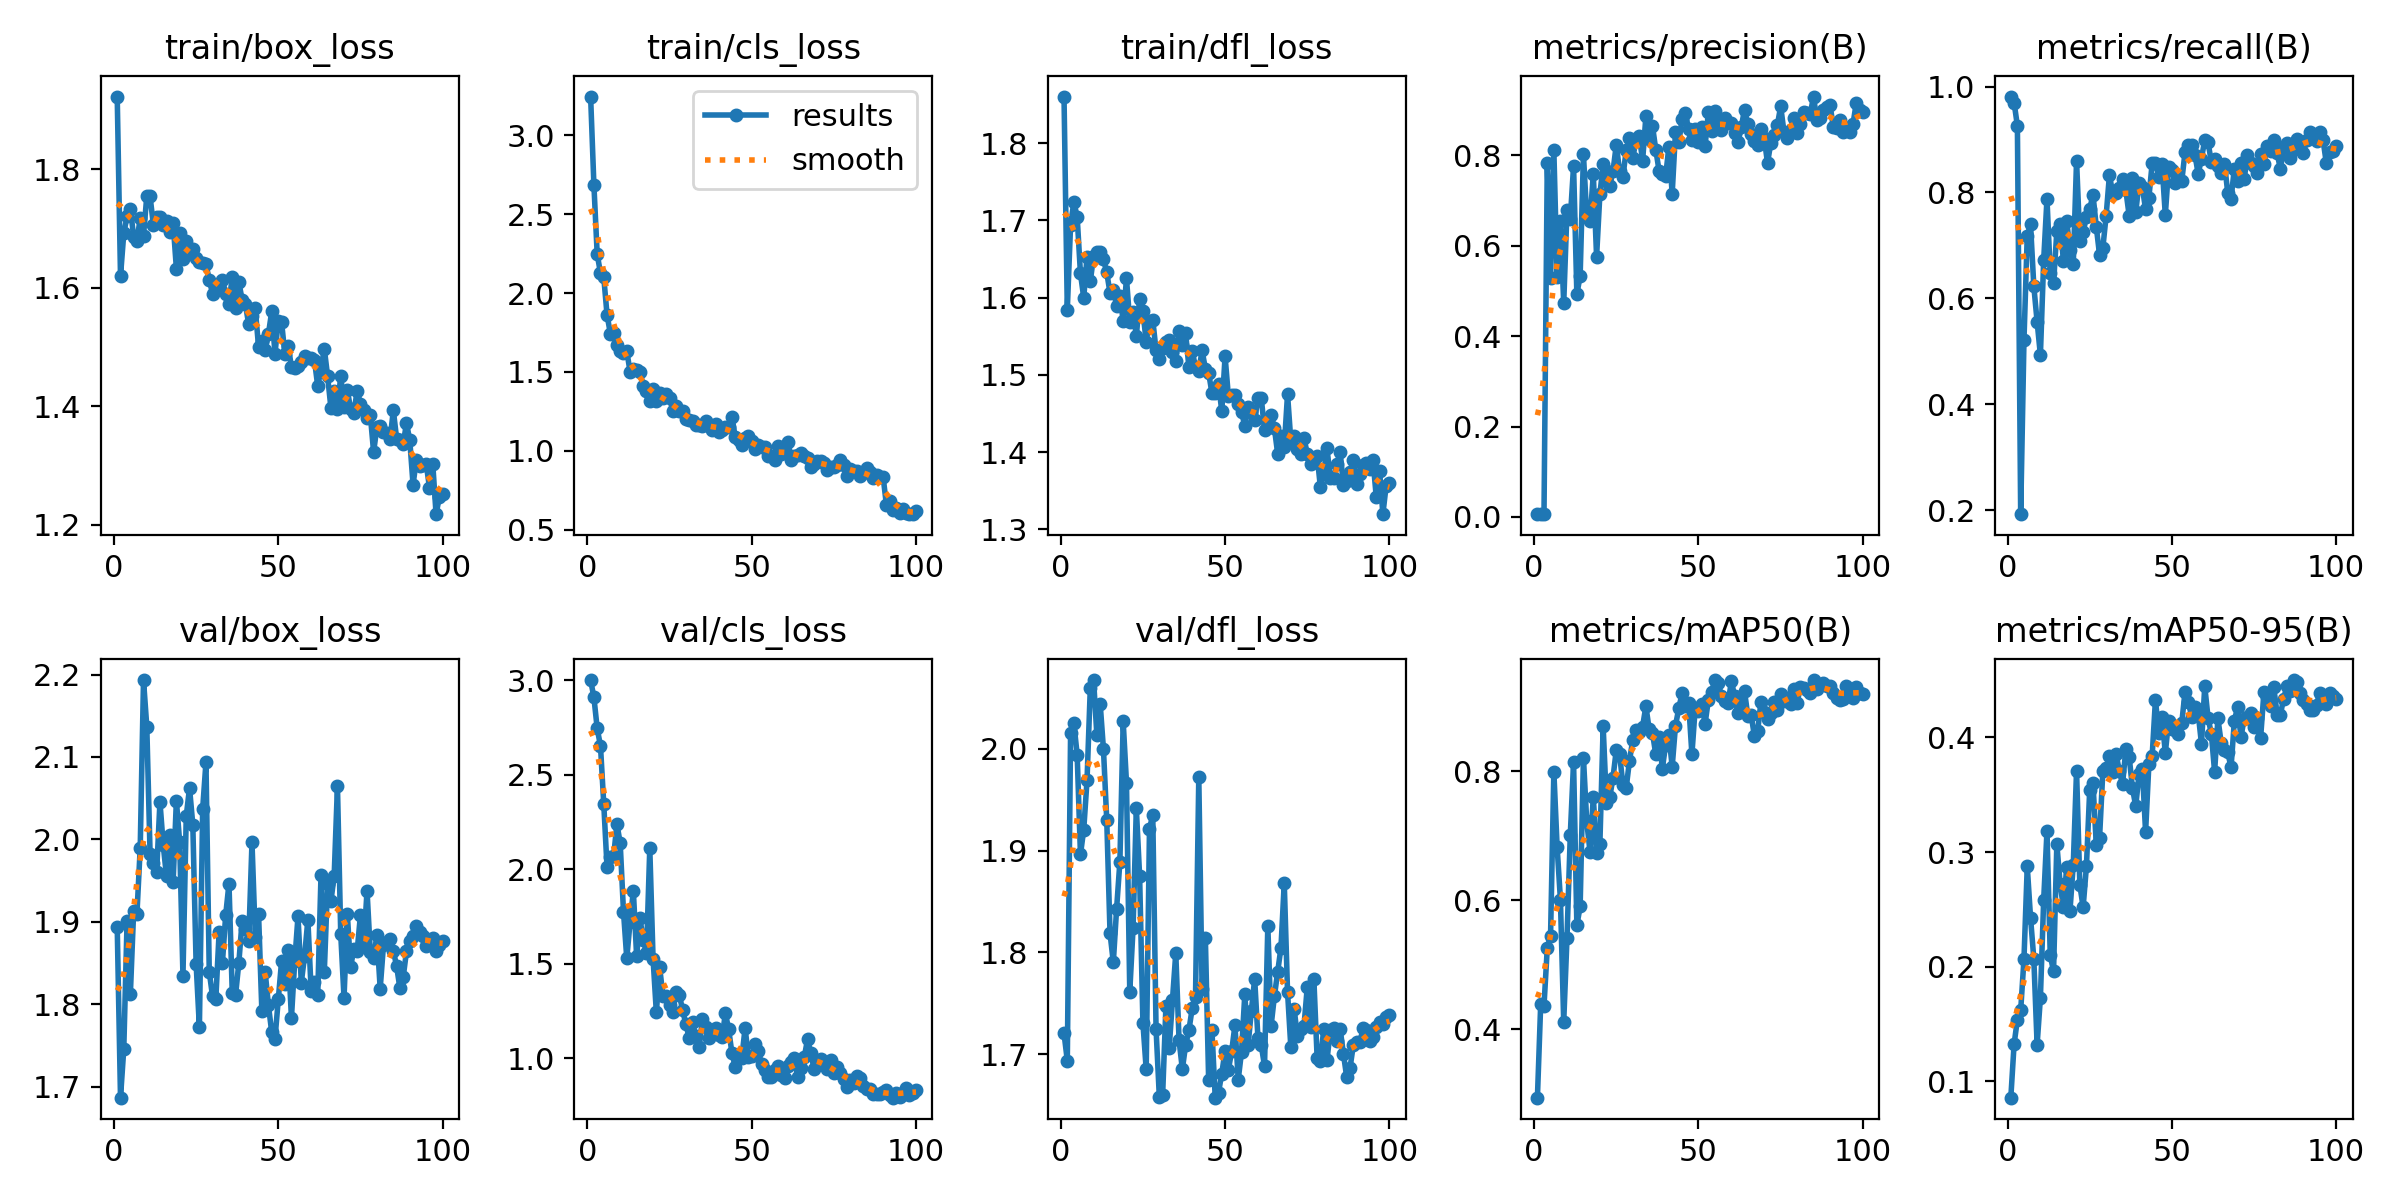

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


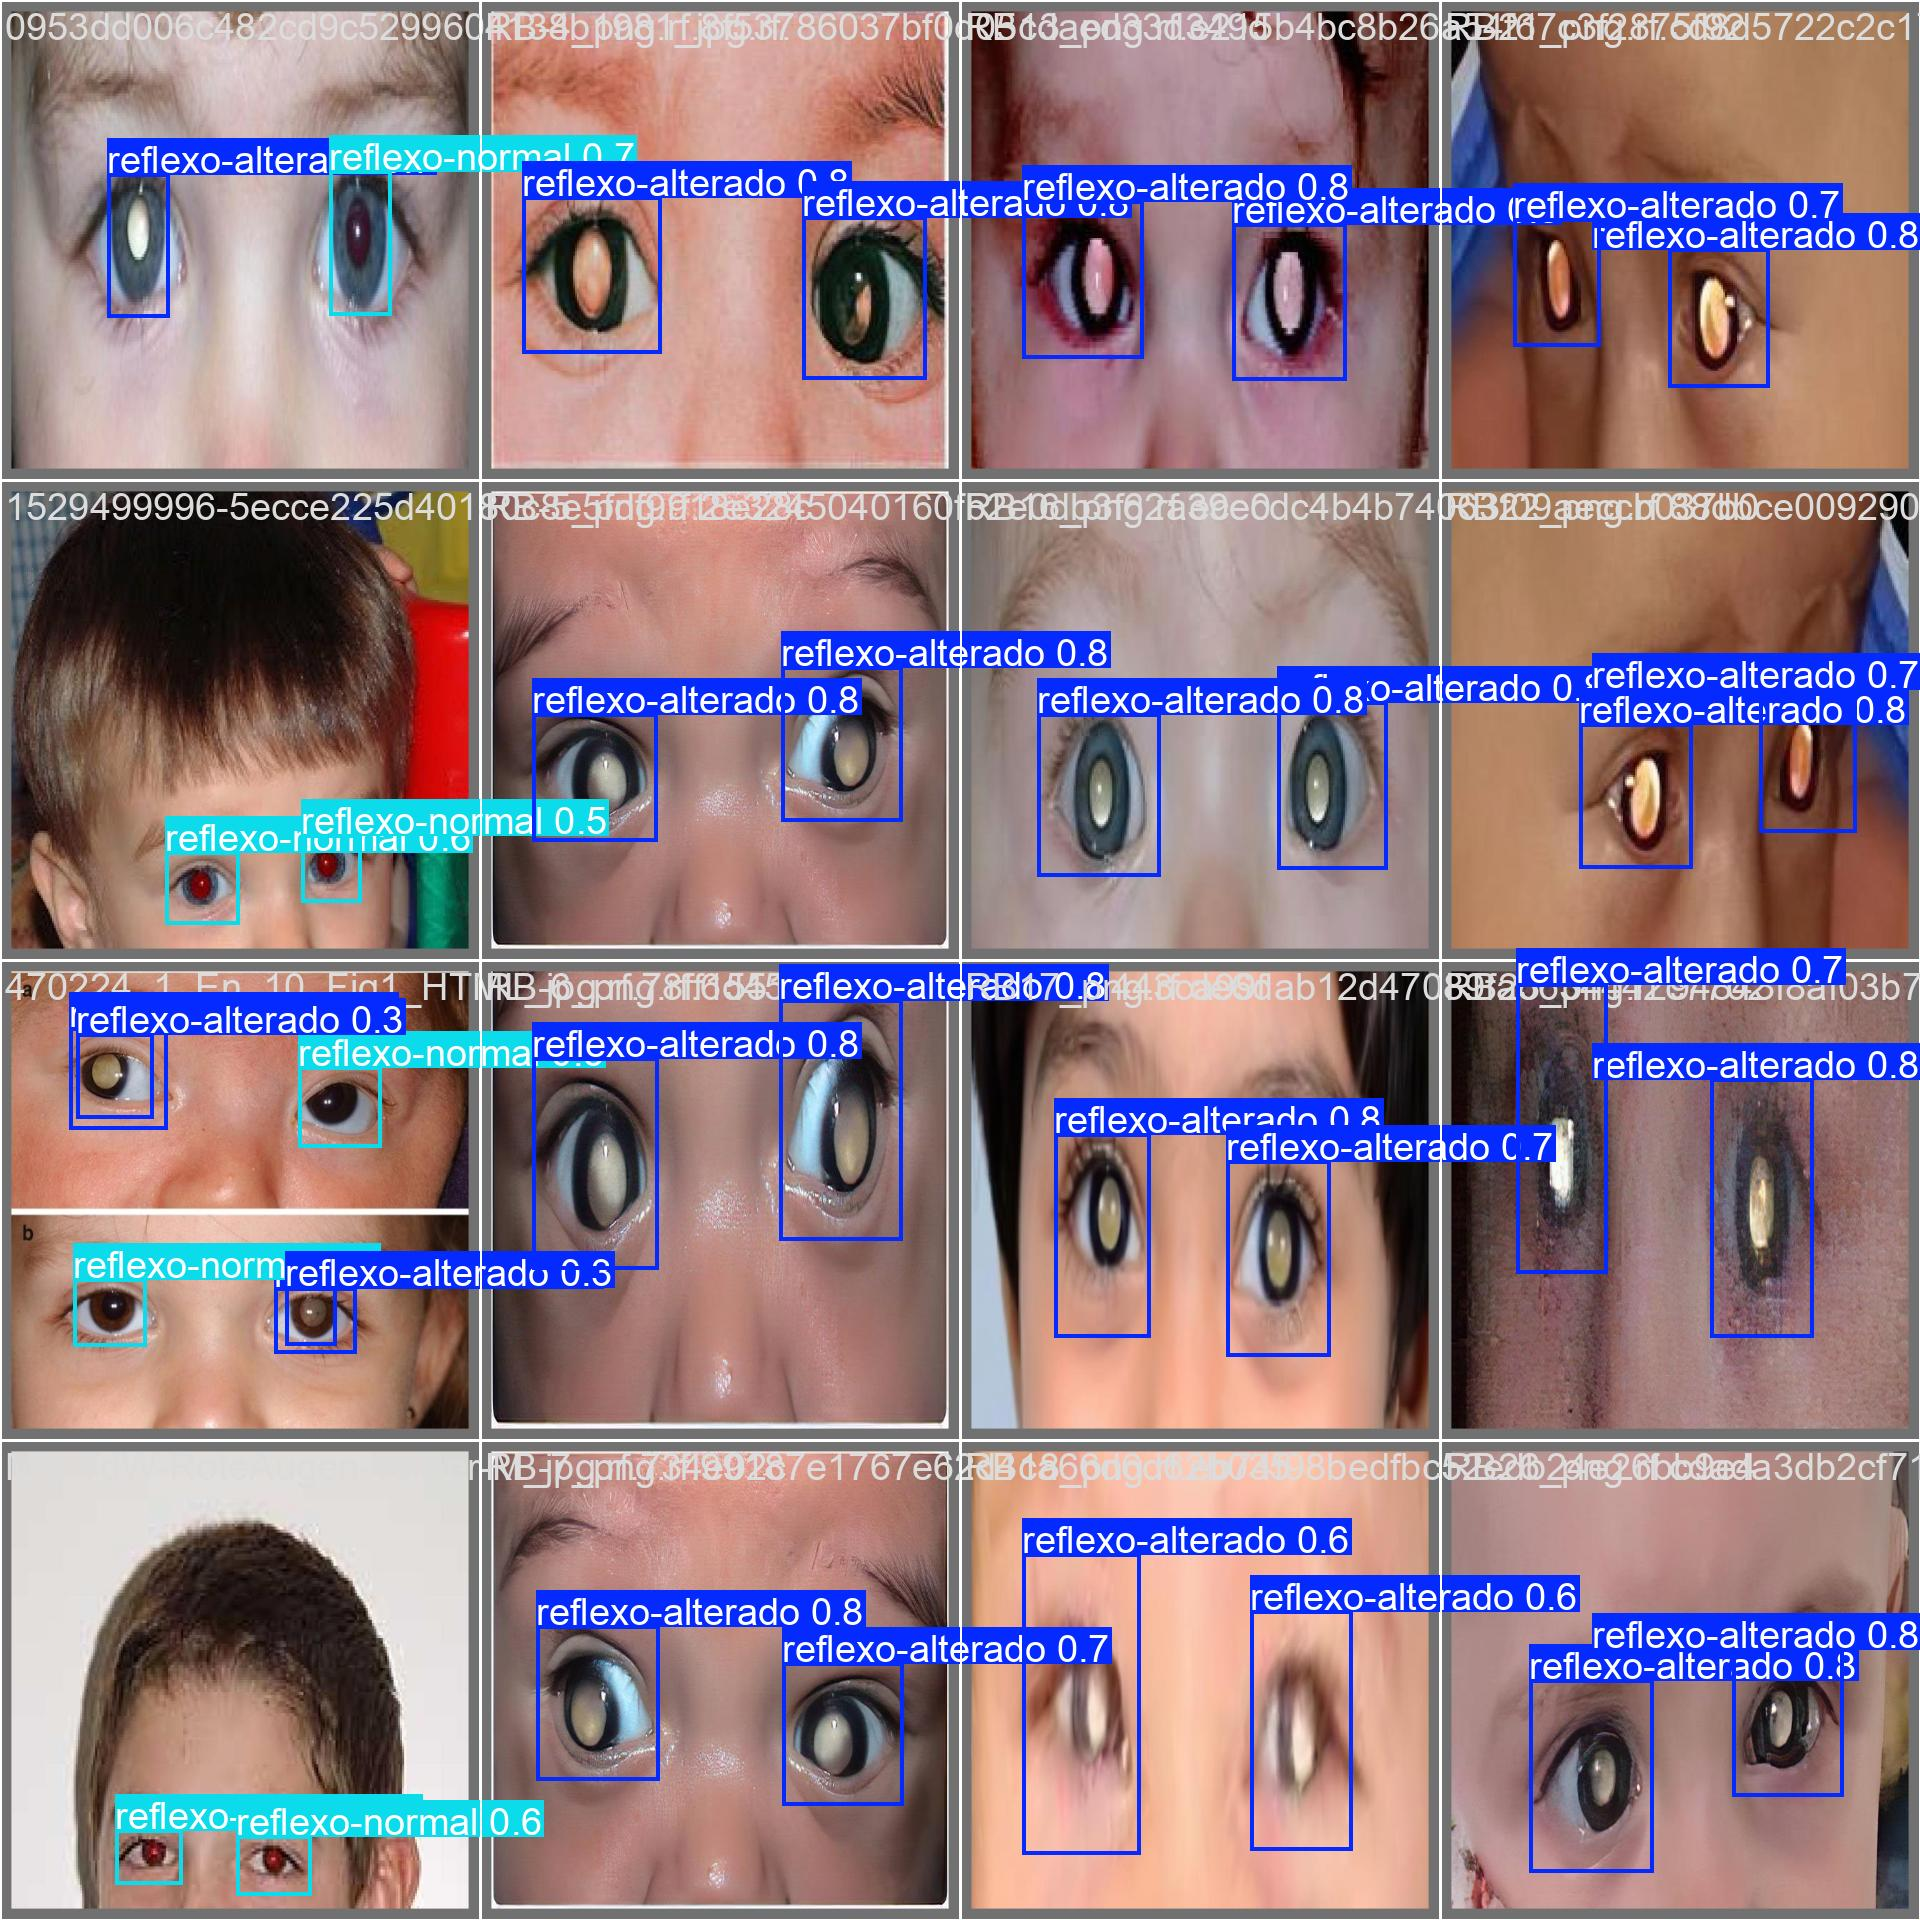

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1386.8±517.0 MB/s, size: 30.6 KB)
val: Scanning /content/datasets/Reflexo-vermelho-3/valid/labels.cache... 102 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 102/102 2.0Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 7/7 2.9it/s 2.4s
                   all        102        205      0.884      0.883      0.934       0.45
      reflexo-alterado         76        111      0.876      0.892      0.936      0.435
        reflexo-normal         68         94      0.891      0.874      0.931      0.465
Speed: 3.8ms preprocess, 6.8ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to /content/runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save=true

/content
Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs

image 1/50 /content/datasets/Reflexo-vermelho-3/test/images/1_owr_lech_191123_gwalsh_jpg.rf.15f4be7221a3cc4cec7f3d84533f81c9.jpg: 640x640 2 reflexo-alterados, 9.5ms
image 2/50 /content/datasets/Reflexo-vermelho-3/test/images/300px-Retinoblastoma_White_Reflex_jpeg.rf.286f61e34ec8899e89253e0662e71377.jpg: 640x640 1 reflexo-alterado, 1 reflexo-normal, 10.2ms
image 3/50 /content/datasets/Reflexo-vermelho-3/test/images/RB-1_png.rf.abdf2c1d55903070da12d685f9027943.jpg: 640x640 2 reflexo-alterados, 8.4ms
image 4/50 /content/datasets/Reflexo-vermelho-3/test/images/RB-3_png.rf.550a8d1a56a302084ae7d68697f8983f.jpg: 640x640 2 reflexo-alterados, 7.9ms
image 5/50 /content/datasets/Reflexo-vermelho-3/test/images/RB-3_png.rf.5d4841694979169e466b0dbebc3df9eb.jpg: 640x640 2 reflexo-alterados, 7.9ms
image 6/50 /content/datasets/Re

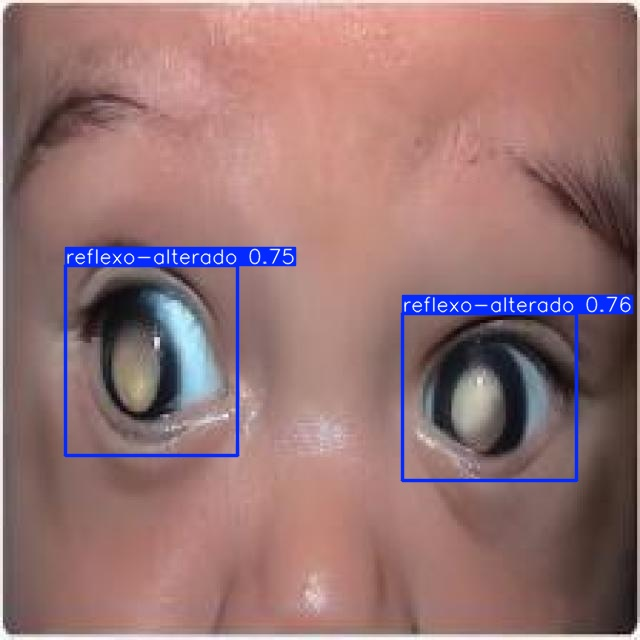

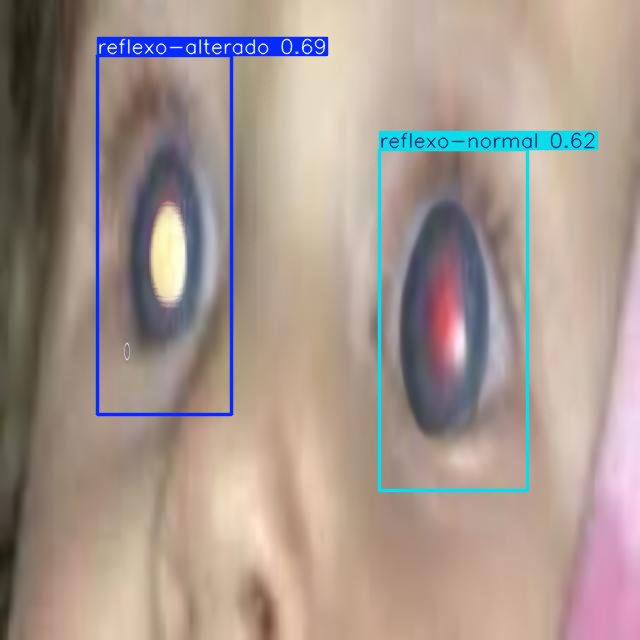

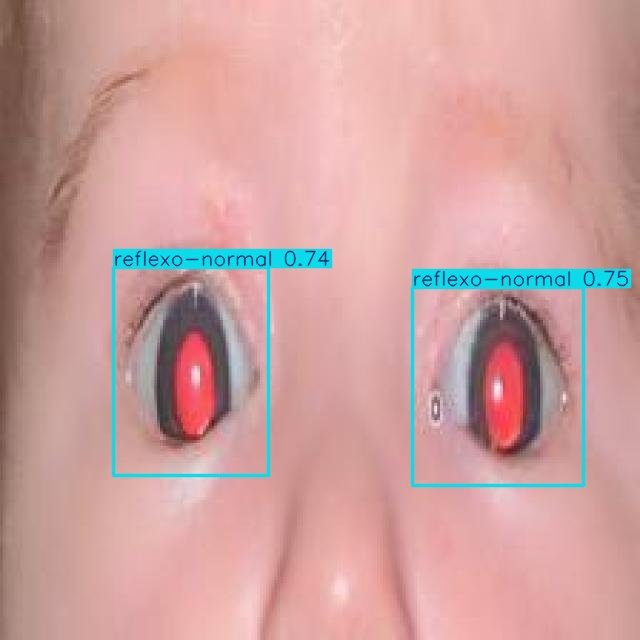

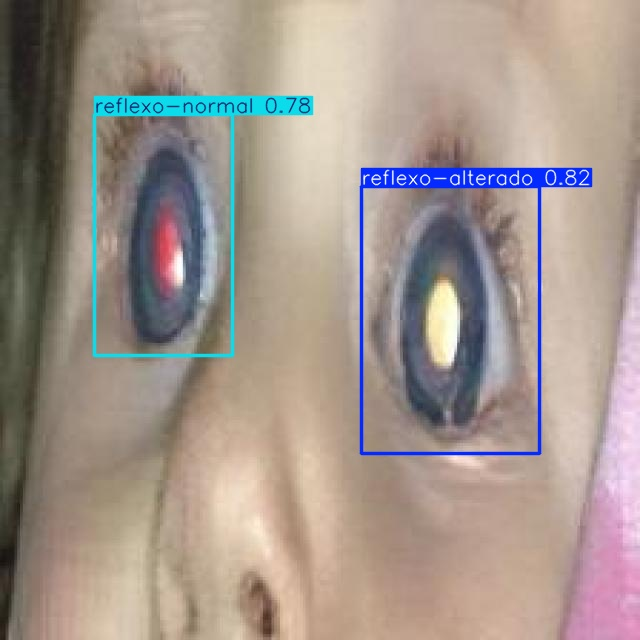

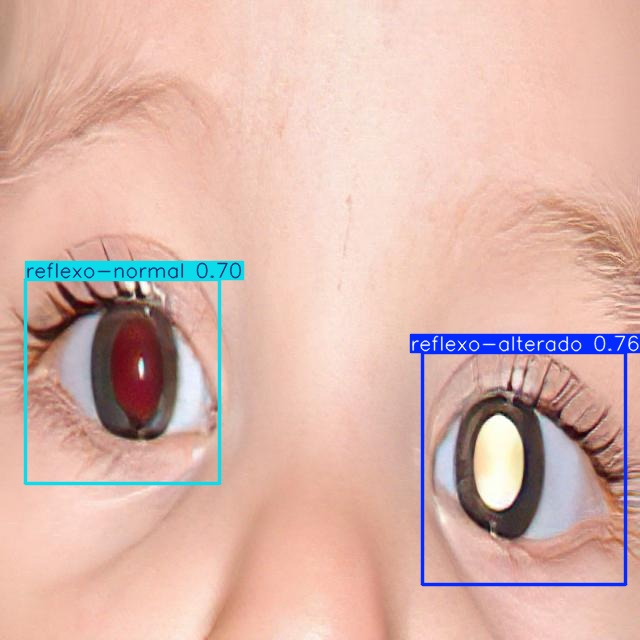

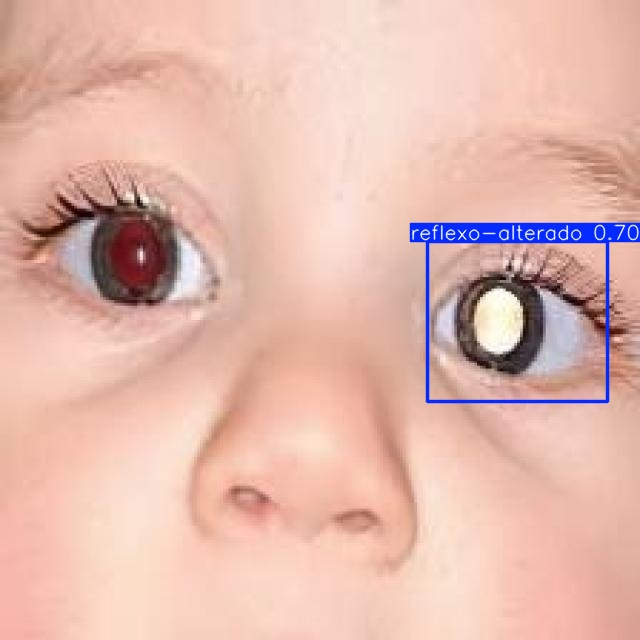

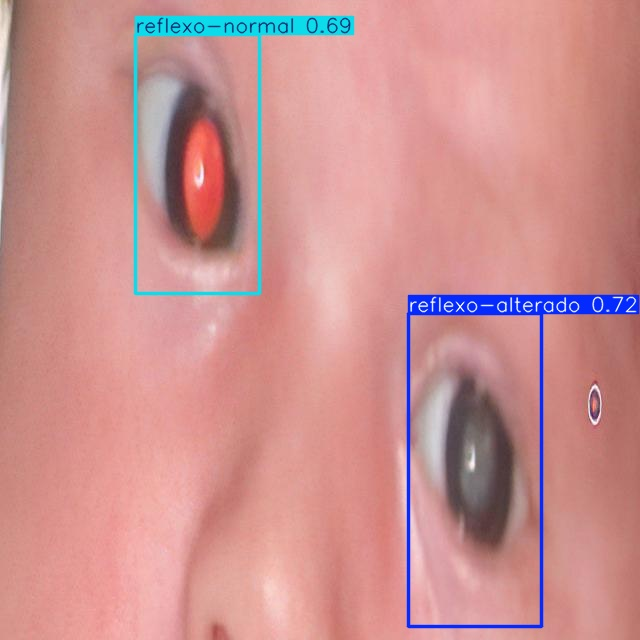

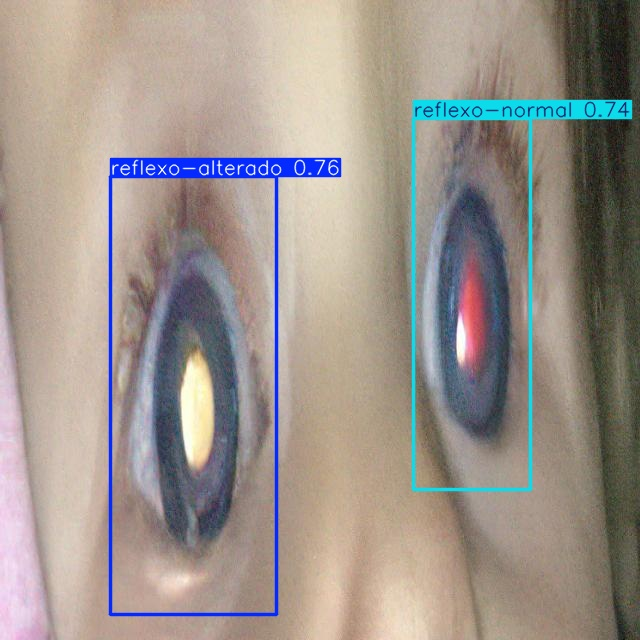

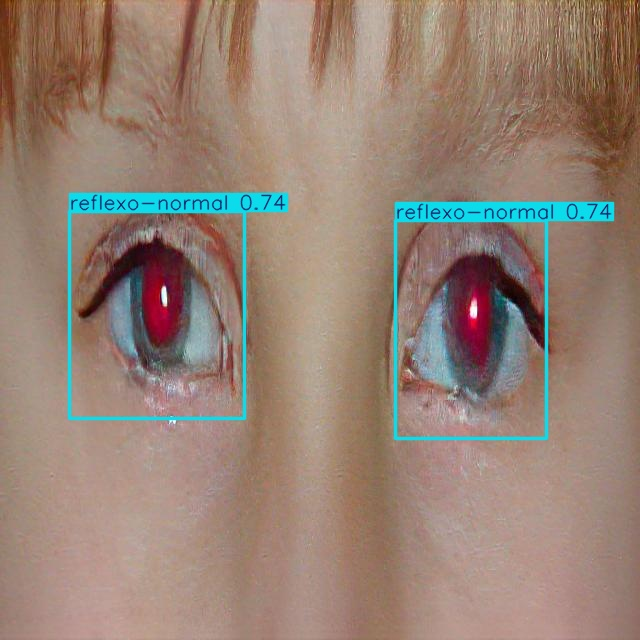

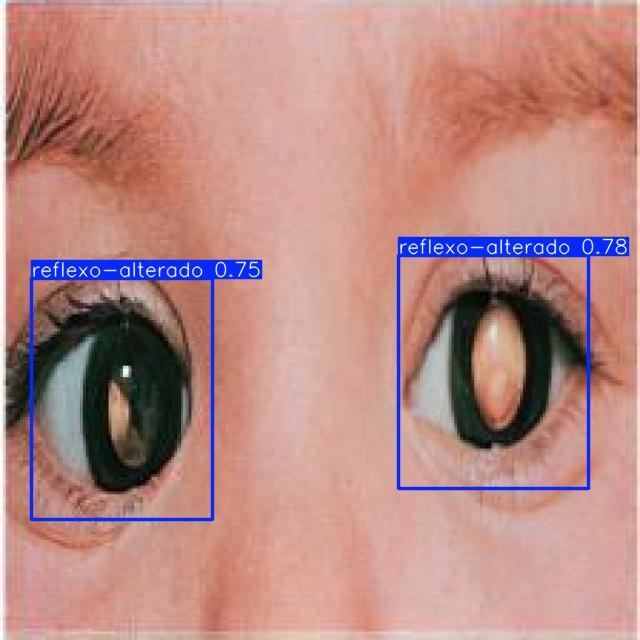

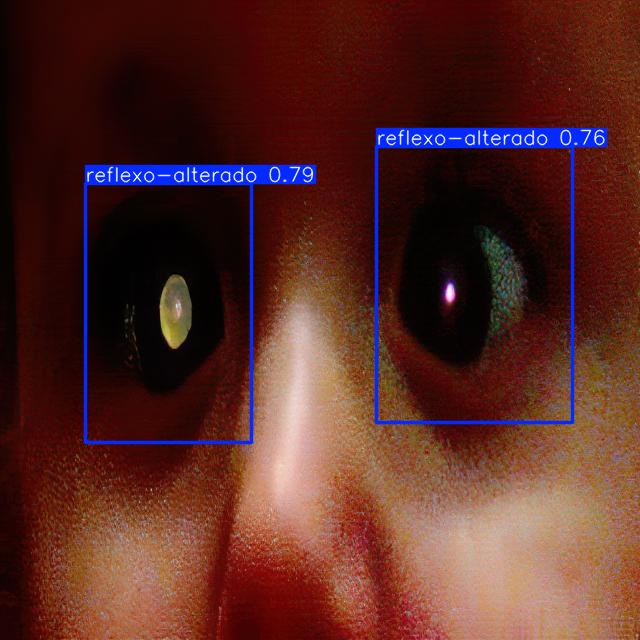

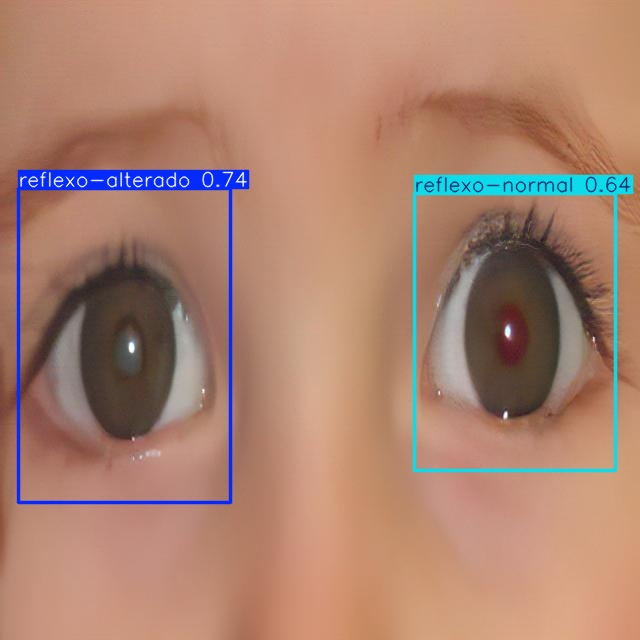

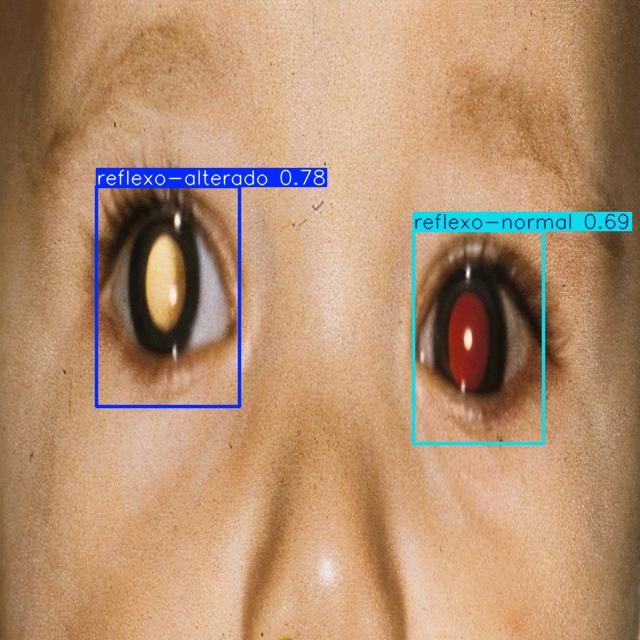

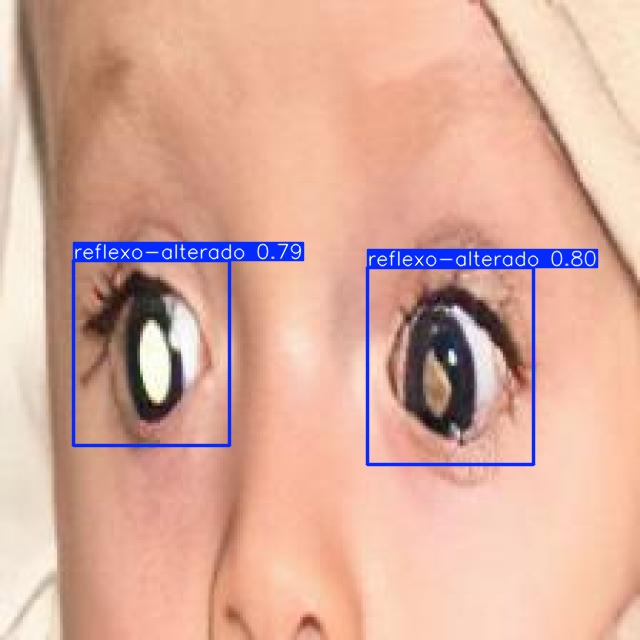

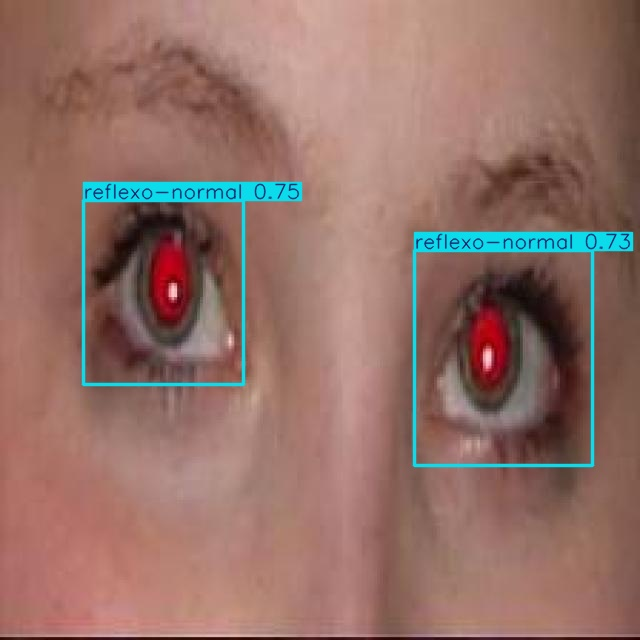

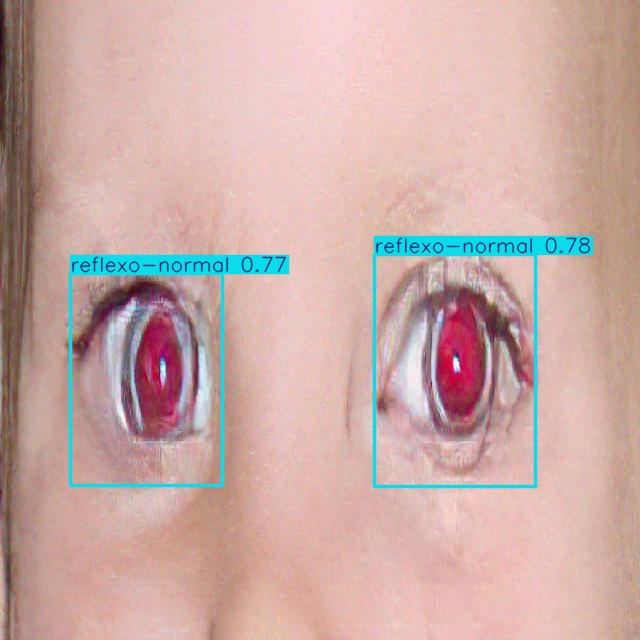

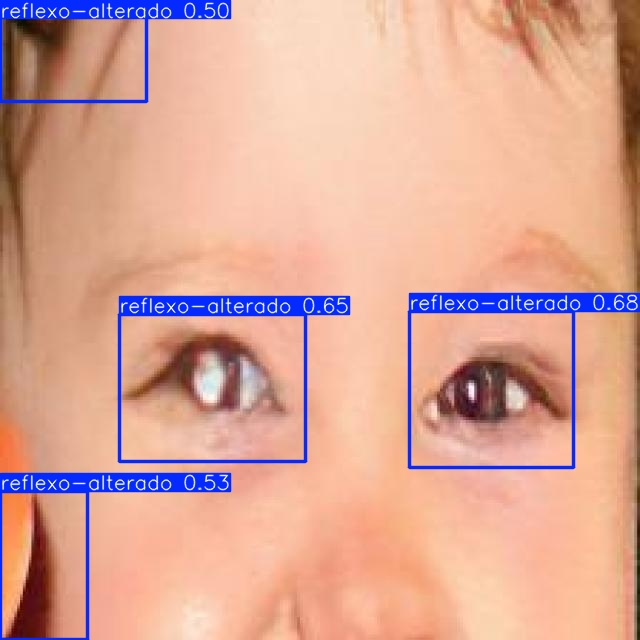

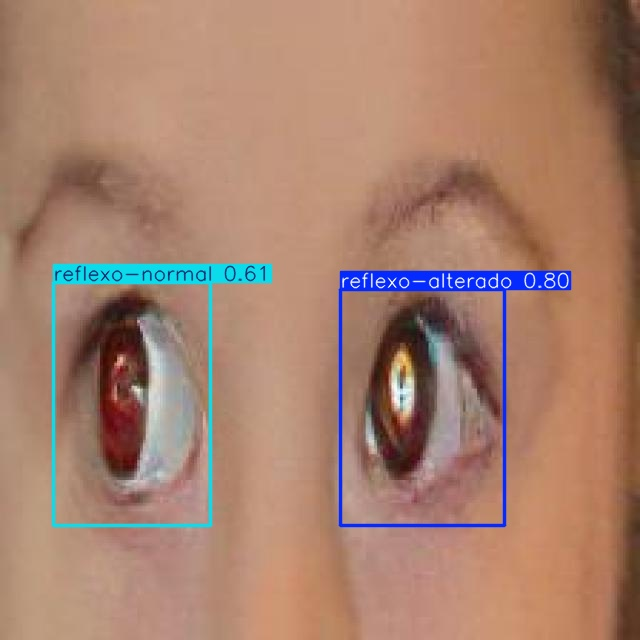

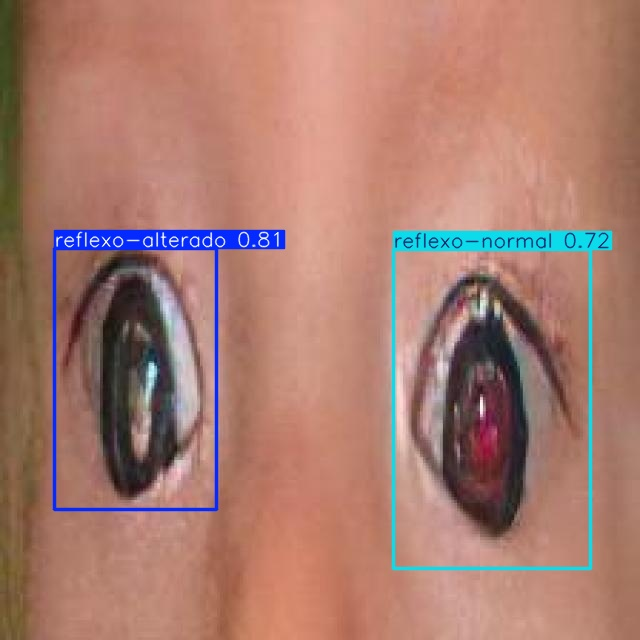

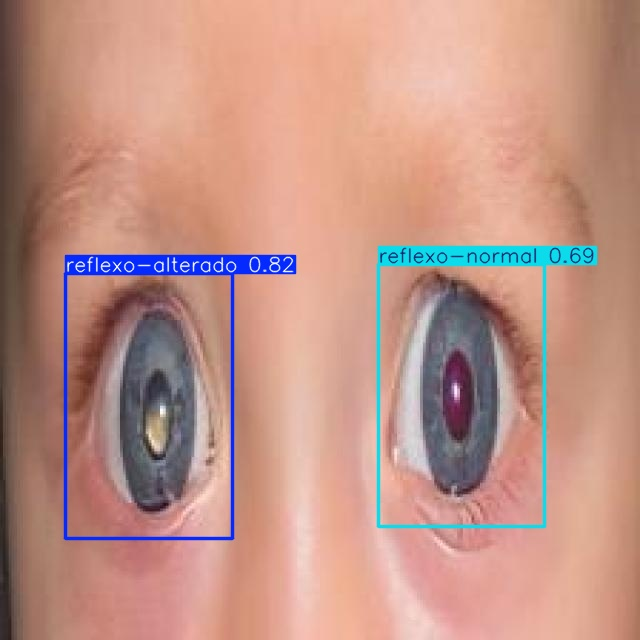

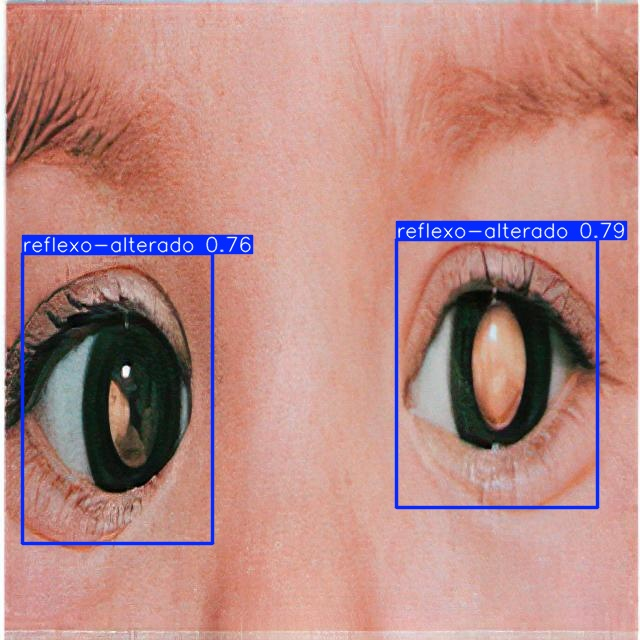

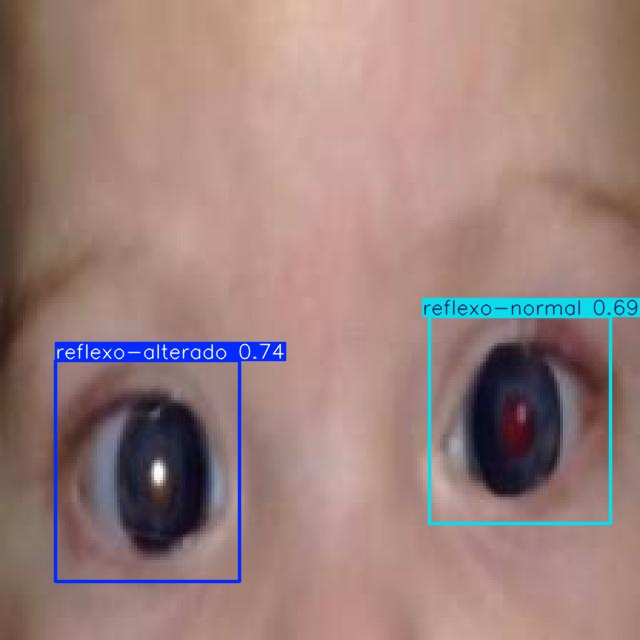

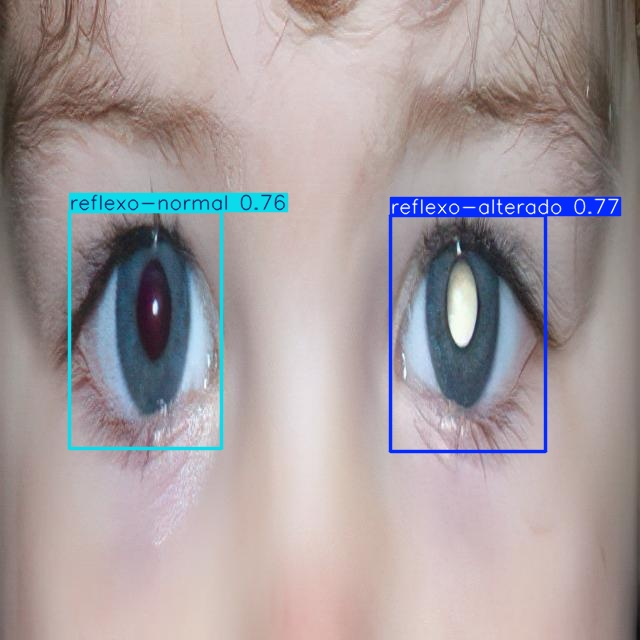

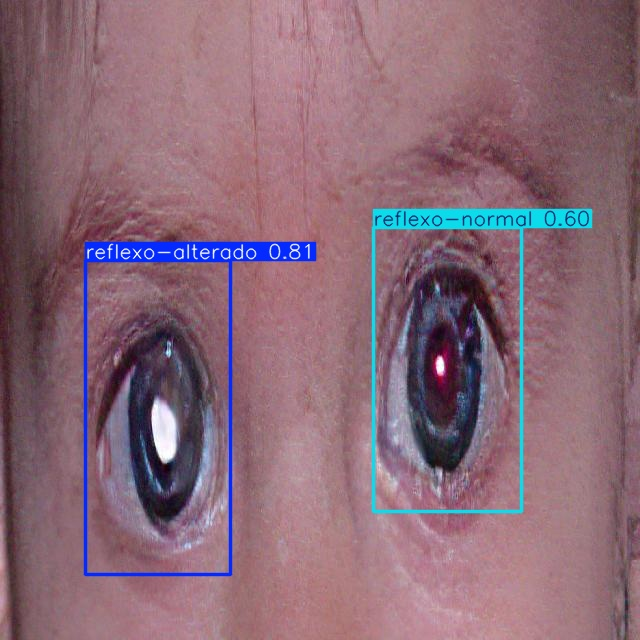

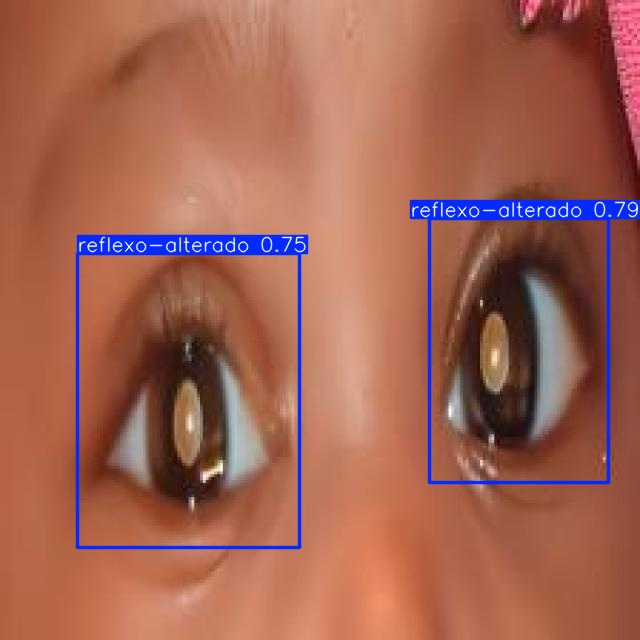

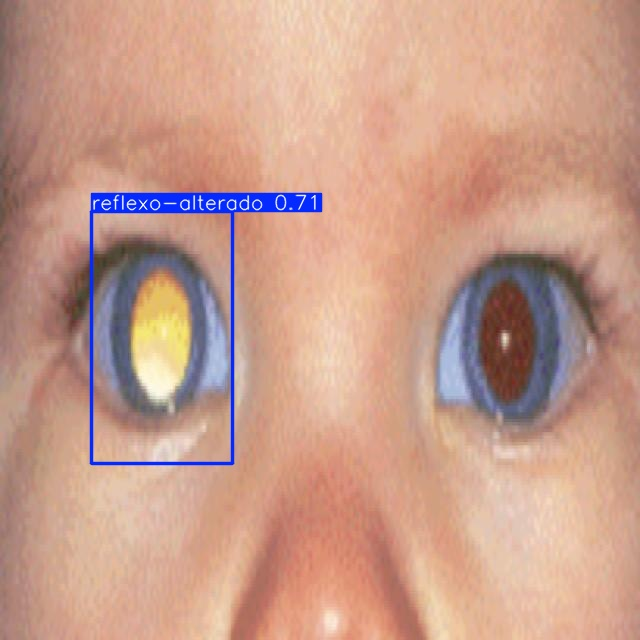

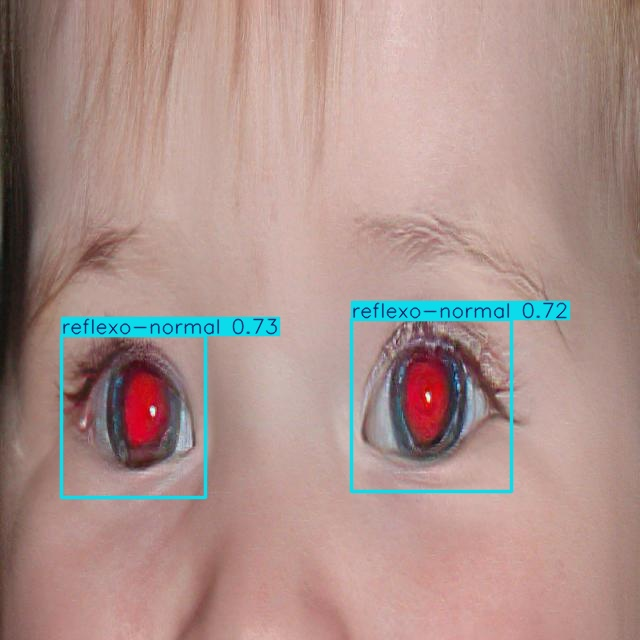

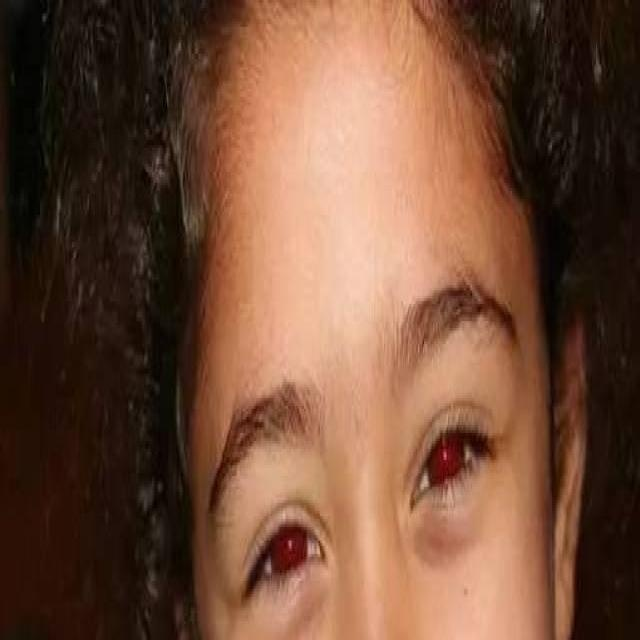

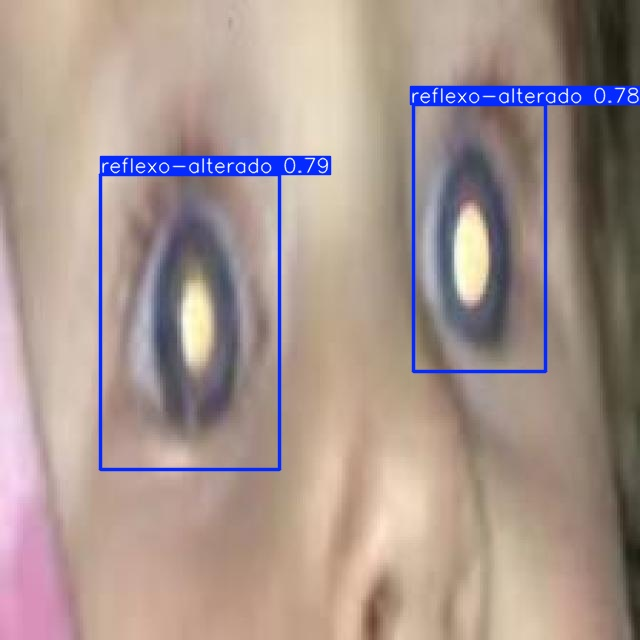

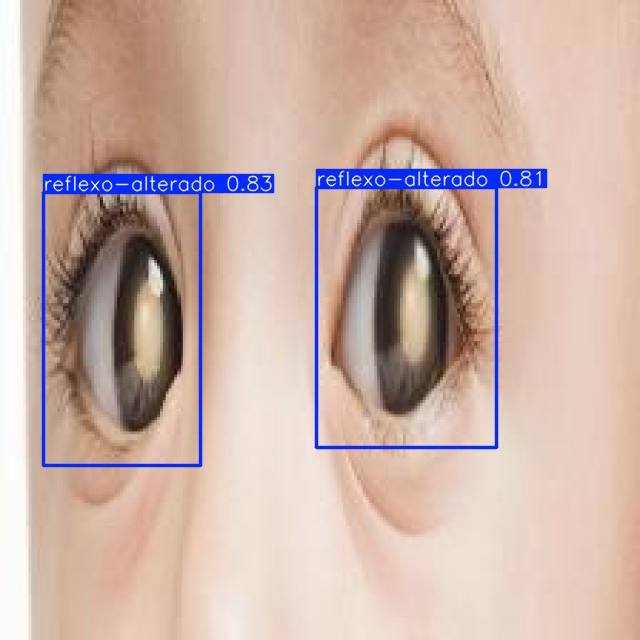

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:30]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
import os
from ultralytics import YOLO

# Caminho do modelo treinado
model_path = f"{HOME}/runs/detect/train/weights/best.pt"

# Carrega o modelo
model = YOLO(model_path)

# Caminho da pasta com as imagens que você quer rotular
images_dir = "/content/drive/MyDrive/datset_roboflow_divididas"

# Diretório de saída para salvar predições e labels
output_dir = f"{HOME}/runs/labeling"

# Faz as predições e já exporta as labels no formato YOLO
results = model.predict(
    source=images_dir,
    conf=0.5,
    save=True,         # salva imagens com as detecções desenhadas
    save_txt=True,     # salva os rótulos em .txt
    project=output_dir,
    name="autolabel"
)

print(f"✅ Rótulos gerados em: {output_dir}/autolabel/labels")



WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1016 /content/drive/MyDrive/datset_roboflow_divididas/0109hoy19_jpg.rf.769c38ff478afd628da0f269fa531c01_direita.jpg: 640x320 1 reflexo-alterado, 9.7ms
image 2/1016 /content/drive/MyDrive/datset_roboflow_divididas/0109hoy19_jpg.rf.769c38ff478afd628da0f269fa531c01_esquerda.jpg: 640x320 1 reflexo-alterado, 8.0ms
image 3/1016 /content/drive/MyDrive/datset_roboflow_divididas/0953dd006c482cd9c5299604138b1981_jpg.rf.a7499e52e8de07d65a97686a96106d87_di


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1016 /content/runs/labeling/autolabel/0109hoy19_jpg.rf.769c38ff478afd628da0f269fa531c01_direita.jpg: 640x320 (no detections), 10.8ms
image 2/1016 /content/runs/labeling/autolabel/0109hoy19_jpg.rf.769c38ff478afd628da0f269fa531c01_esquerda.jpg: 640x320 1 reflexo-normal, 7.2ms
image 3/1016 /content/runs/labeling/autolabel/0953dd006c482cd9c5299604138b1981_jpg.rf.a7499e52e8de07d65a97686a96106d87_direita.jpg: 640x320 1 reflexo-normal, 8.5ms
image 4/1

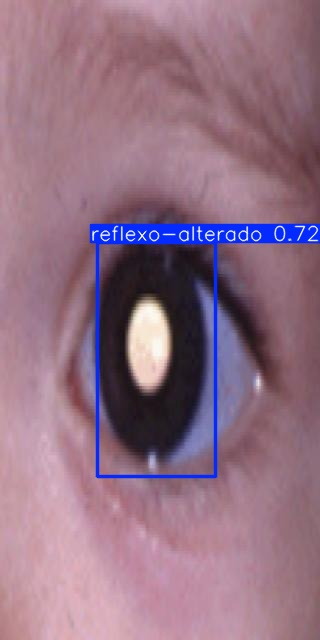

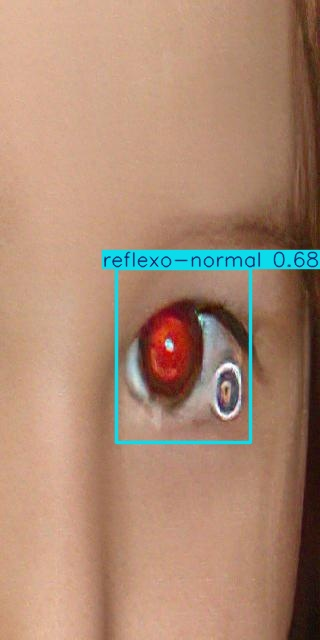

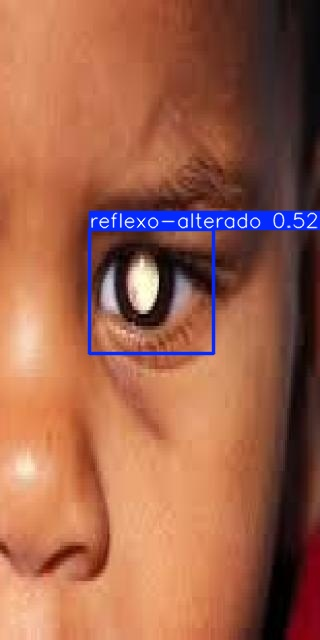

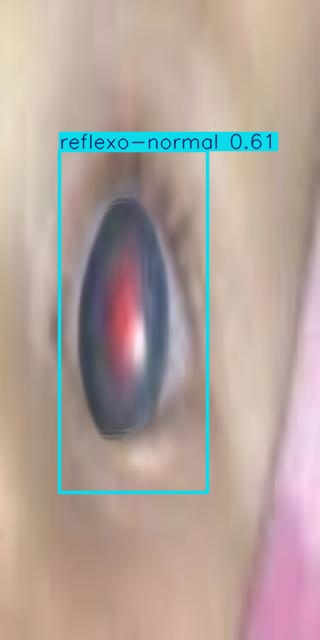

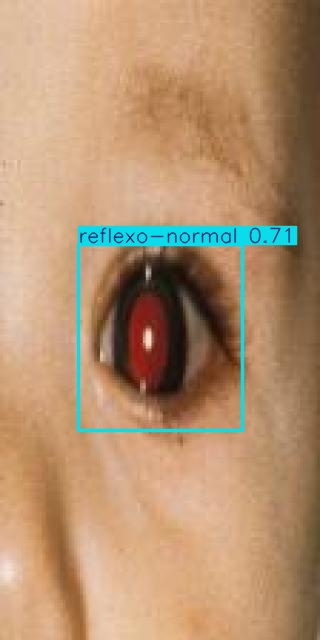

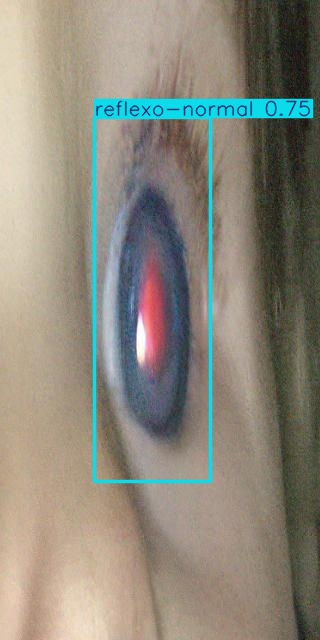

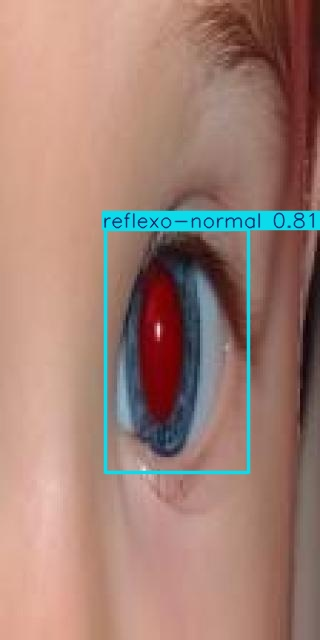

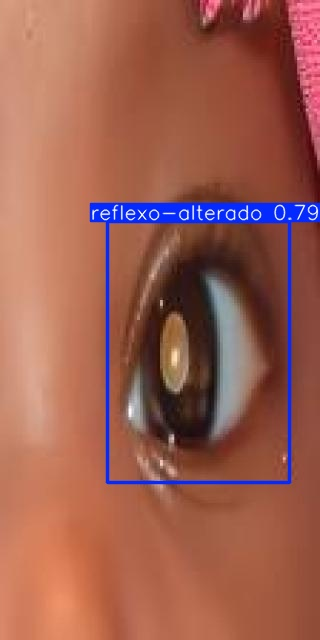

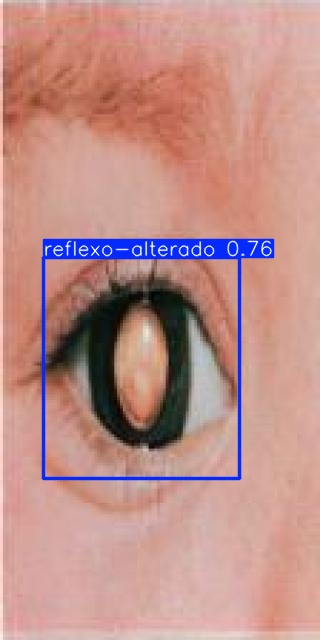

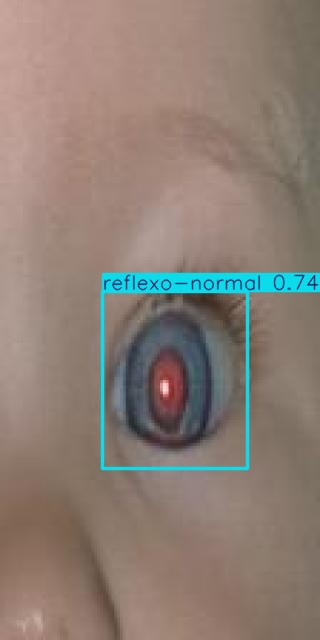

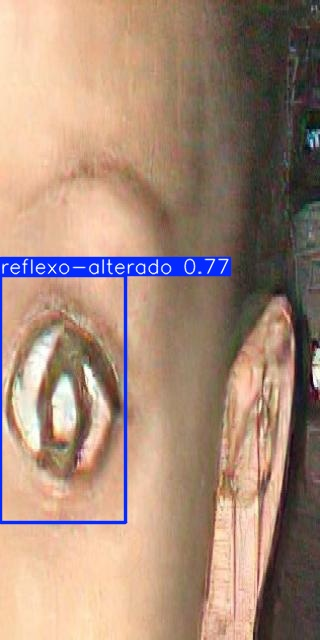

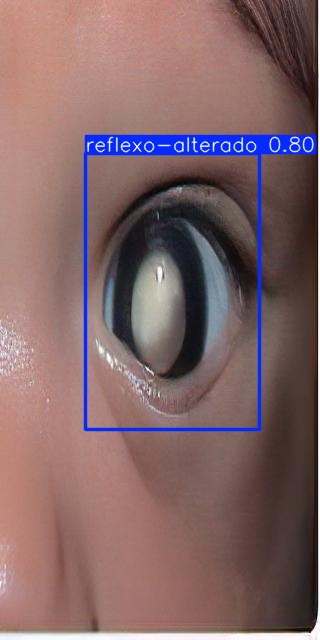

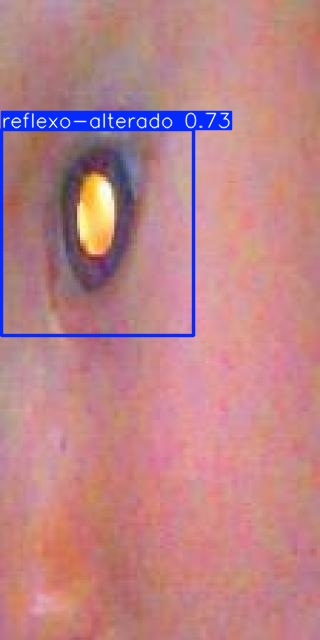

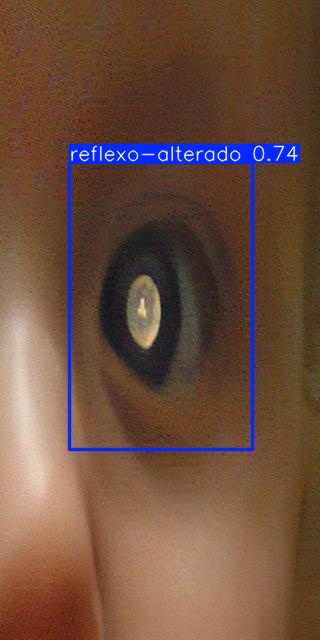

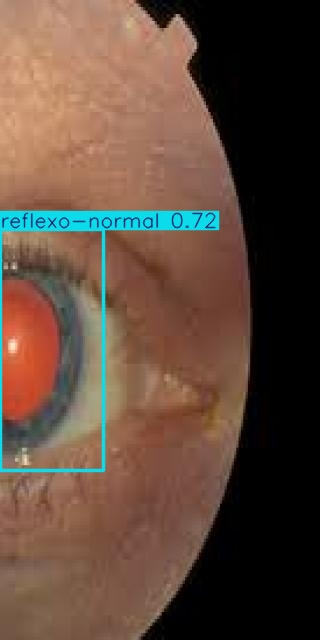

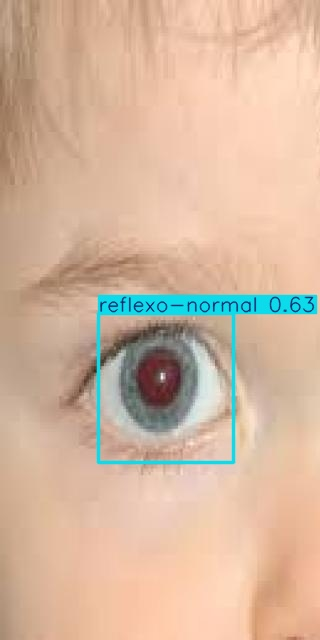

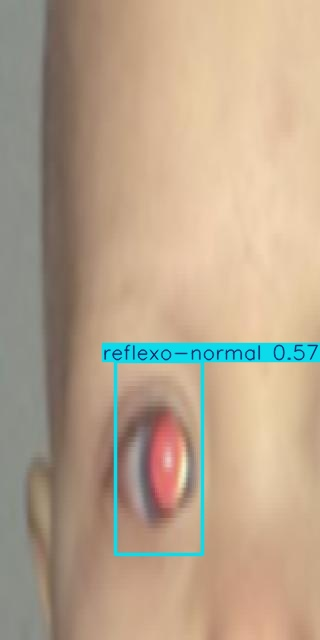

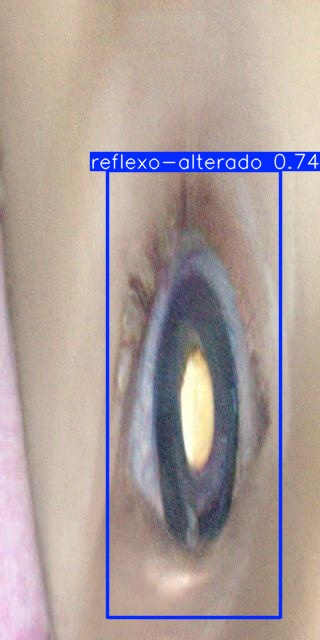

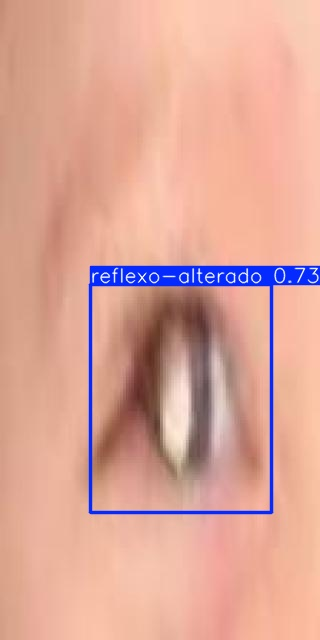

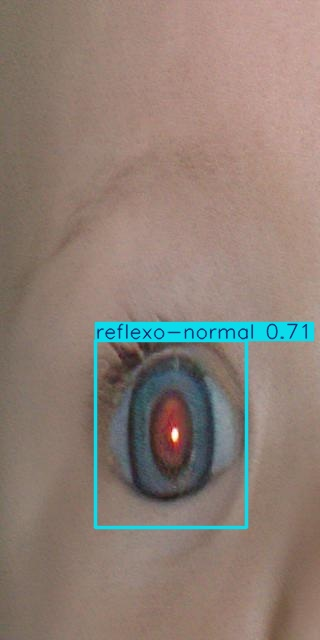

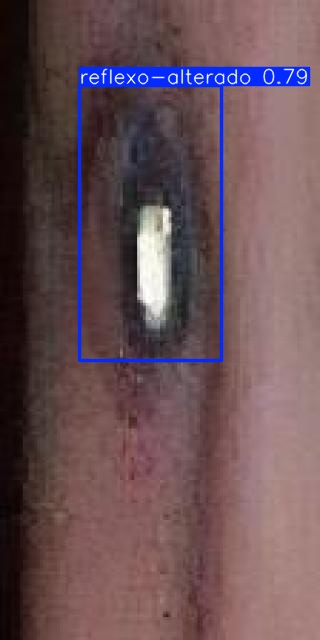

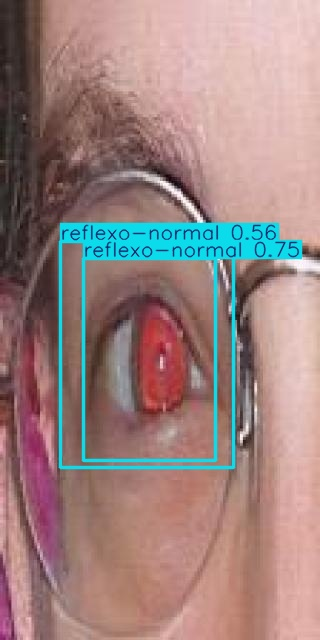

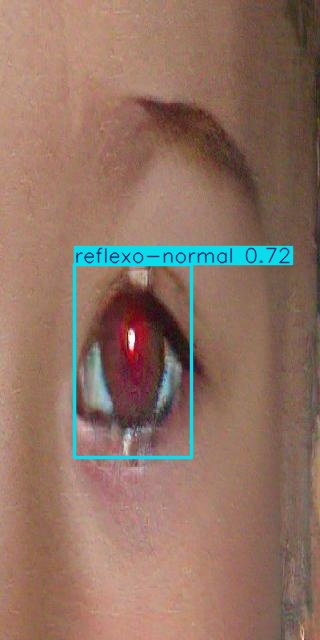

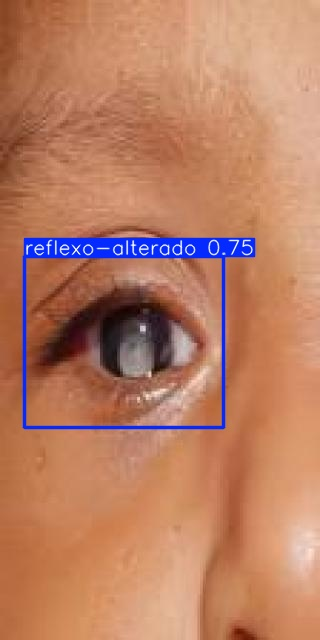

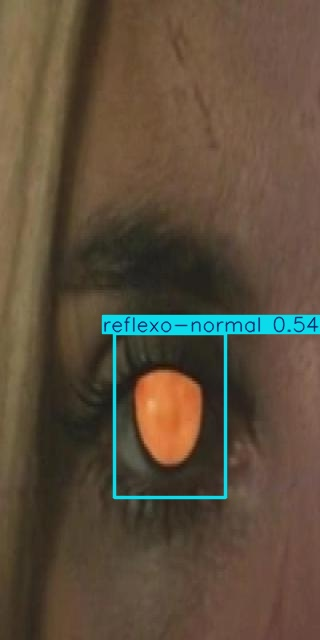

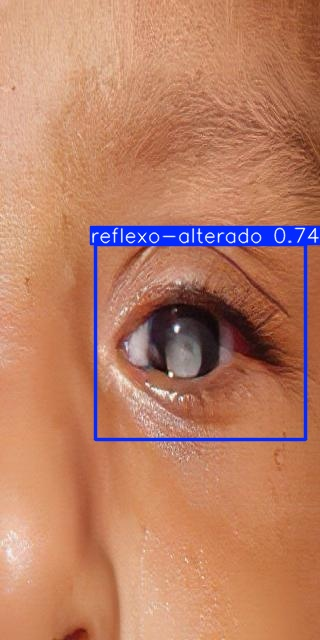

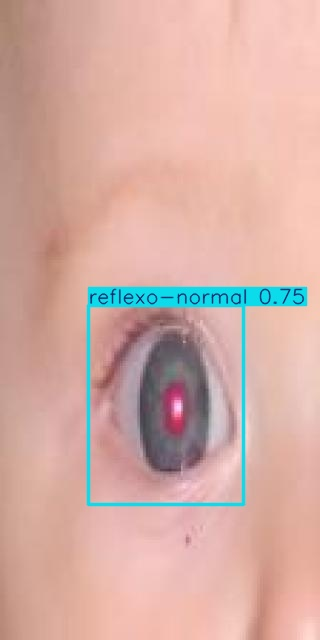

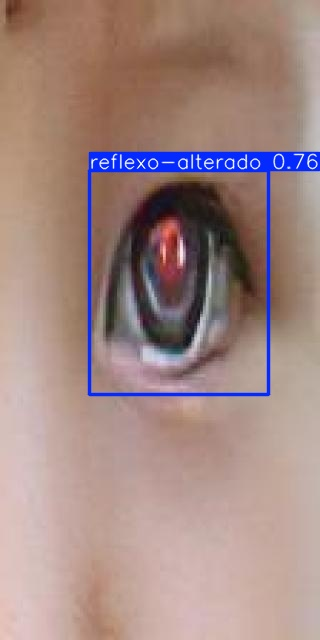

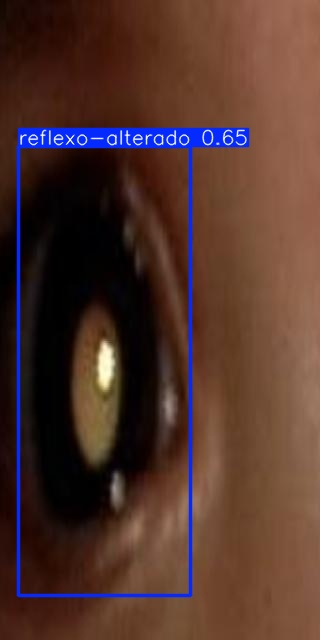

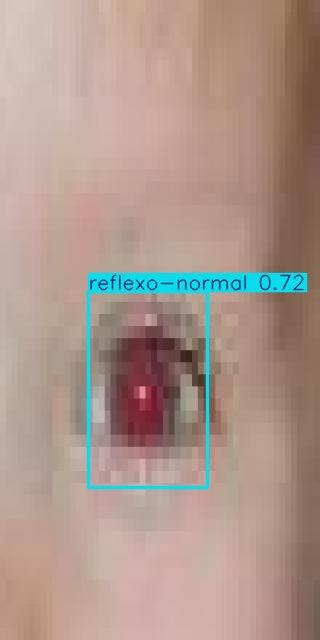

In [ ]:
import glob
from ultralytics import YOLO
from IPython.display import Image, display

# Caminho do modelo treinado
weights_path = "/content/runs/detect/train/weights/best.pt"  # ou o mais recente

# Pasta com as imagens individuais de olho
single_eye_images = "/content/runs/labeling/autolabel"  # cada arquivo = 1 olho

# Carregar modelo
model = YOLO(weights_path)

# Rodar predição apenas nas imagens individuais
results = model.predict(
    source=single_eye_images,
    conf=0.5,
    save=True,       # salva imagens anotadas
    save_txt=True    # salva labels em .txt
)

# Mostrar algumas imagens anotadas
predicted_images = glob.glob(f'{single_eye_images}/*.jpg')
for img_path in predicted_images[:30]:
    display(Image(filename=img_path, height=600))

In [ ]:
# ================================
# Configurações iniciais
# ================================
import os
from IPython.display import Image, display

HOME = os.getcwd()

# Caminhos
images_dir = "/content/drive/MyDrive/datset_roboflow_divididas"  # suas imagens
labels_dir = f"{HOME}/runs/labeling/autolabel/labels"            # labels gerados
output_dir = f"{HOME}/runs/detect/train"                         # pasta de treino

# Número de classes e nomes
num_classes = 2
class_names = ['reflexo-normal', 'reflexo-alterado']

# ================================
# Cria o data.yaml para o YOLO
# ================================
data_yaml_path = os.path.join(HOME, "data.yaml")
with open(data_yaml_path, "w") as f:
    f.write(f"train: {images_dir}\n")
    f.write(f"val: {images_dir}\n")
    f.write(f"nc: {num_classes}\n")
    f.write(f"names: {class_names}\n")

print(f"✅ data.yaml criado em {data_yaml_path}")

# ================================
# Treinamento do modelo
# ================================
%cd {HOME}

!yolo task=detect mode=train model=yolo11n.pt data={data_yaml_path} epochs=100 imgsz=640 batch=32 project={output_dir} name="autolabel_train"

# ================================
# Visualização das métricas
# ================================
train_results_dir = f"{output_dir}/autolabel_train"

display(Image(filename=f'{train_results_dir}/confusion_matrix.png', width=600))
display(Image(filename=f'{train_results_dir}/results.png', width=600))

# ================================
# Validação do modelo treinado
# ================================
!yolo task=detect mode=val model={train_results_dir}/weights/best.pt data={data_yaml_path}


✅ data.yaml criado em /content/data.yaml
/content
Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=autolabel_train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True

FileNotFoundError: [Errno 2] No such file or directory: '/content/runs/detect/train/autolabel_train/confusion_matrix.png'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
